In [2]:
from pymongo import MongoClient as mc
from gridfs import GridFS as gfs
from bson import objectid

In [3]:
# mongodb의 python_test 데이터베이스에 접속
db = mc().python_test

In [4]:
# python_test에 파일을 저장할 GridFS 객체 생성
fs = gfs(db)

In [17]:
# c:/ai/workspace/mongodb/test.txt를 읽을 객체 f 생성
with open("c:/ai/workspace/mongodb/test.txt", 'rb') as f:
    # f를 통해 데이터를 읽어 GridFS에 저장
    fs.put(f, filename="test.txt")

In [18]:
# GridFS에 저장된 파일 조회
db.fs.files.find()

In [19]:
list(db.fs.files.find())

[{'_id': ObjectId('608f8c935d4e4640dde6eac0'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 5, 39, 31, 282000)}]

In [21]:
f = fs.get_last_version(filename="test.txt")

In [22]:
data=f.read()
data

b'\xeb\xaa\xbd\xea\xb3\xa0DB GRIDFS\xec\x97\x90 \xec\xa0\x80\xec\x9e\xa5\xed\x95\xa0 \xeb\x82\xb4\xec\x9a\xa9'

In [23]:
data.decode("UTF-8")

'몽고DB GRIDFS에 저장할 내용'

In [15]:
db.fs.files.delete_many({'filename': 'exercisecat.png'})

### 이미지 파일을 mongoDB에 저장하기

In [ ]:
from pymongo import MongoClient
from gridfs improt GridFS
from bson.objectid import ObjectId
from gridfs import GridFSBucket

In [24]:
url = "http://cdn.kormedi.com/wp-content/uploads/2018/10/shutterstock_1021836841-768x511.jpg"

In [25]:
import urllib.request
data = urllib.request.urlopen(url).read()

In [85]:
# cmd 창에서 설치하는 것처럼 라이브러리 설치
! pip install image

distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None


  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19486 sha256=14e78755297bcaadae28945256300166c796ba0d022ba6c5986ce3067c68a515
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ac\30\5c\a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built image


In [87]:
! pip install pillow

distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [26]:
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket as gfsbk

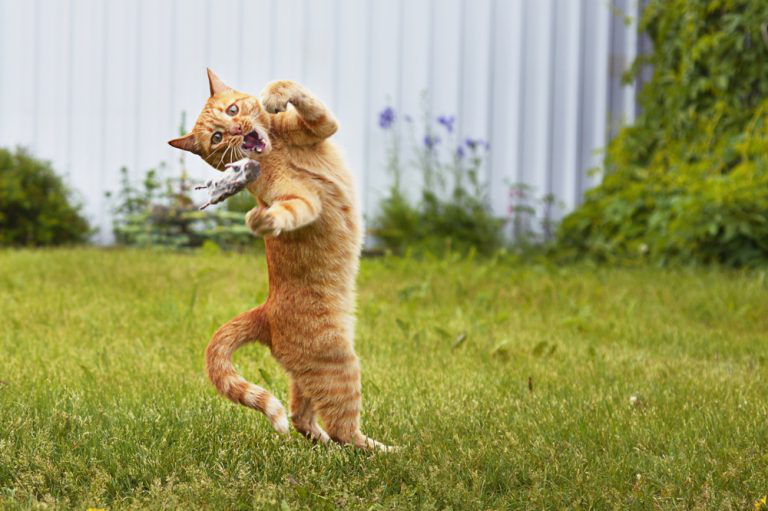

In [27]:
# 이미지 주소를 받아와 이미지 출력
Image.open(BytesIO(data))

In [28]:
# 이미지 파일을 저장할 객체 생성
bucket = gfsbk(db)

In [29]:
# 이미지 파일을 GridFS에 저장할 객체 생성
grid_in = bucket.open_upload_stream(
        "exercisecat.png", metadata={"contentType":"image/png"})

In [30]:
# 이미지의 내용을 GridFS에 저장
grid_in.write(data)

In [31]:
# 이미지 저장 종료
grid_in.close()

### 파이썬을 이용해 mongoDB에 저장된 이미지 조회

In [32]:
from bson.objectid import ObjectId
from io import BytesIO

In [33]:
# mongodb에 python_test 데이터베이스에 접속
db = mc().python_test
# python_test에 파일을 저장할 GridFS 객체 생성
fs = gfs(db)

{'_id': ObjectId('608f8cab5d4e4640dde6eac2'),
 'filename': 'exercisecat.png',
 'metadata': {'contentType': 'image/png'},
 'chunkSize': 261120,
 'md5': '4e26f6b7d81ce79877dbf6f7036eb46b',
 'length': 73630,
 'uploadDate': datetime.datetime(2021, 5, 3, 5, 39, 56, 619000)}

In [34]:
# GridFS에 저장도니 데이터 중 파일명을 조회
db.fs.files.find()[1]["filename"]

'exercisecat.png'

In [36]:
list(db.fs.files.find())

[{'_id': ObjectId('608f8c935d4e4640dde6eac0'),
  'filename': 'test.txt',
  'md5': '0b97c2704cfb0e1892bb47a0b62bef96',
  'chunkSize': 261120,
  'length': 35,
  'uploadDate': datetime.datetime(2021, 5, 3, 5, 39, 31, 282000)},
 {'_id': ObjectId('608f8cab5d4e4640dde6eac2'),
  'filename': 'exercisecat.png',
  'metadata': {'contentType': 'image/png'},
  'chunkSize': 261120,
  'md5': '4e26f6b7d81ce79877dbf6f7036eb46b',
  'length': 73630,
  'uploadDate': datetime.datetime(2021, 5, 3, 5, 39, 56, 619000)}]

In [38]:
# GridFS에 저장된 데이터 중 1번 index에 저장된 정보 조회
file_detail = db.fs.files.find()[1]
file_detail

{'_id': ObjectId('608f8cab5d4e4640dde6eac2'),
 'filename': 'exercisecat.png',
 'metadata': {'contentType': 'image/png'},
 'chunkSize': 261120,
 'md5': '4e26f6b7d81ce79877dbf6f7036eb46b',
 'length': 73630,
 'uploadDate': datetime.datetime(2021, 5, 3, 5, 39, 56, 619000)}

In [39]:
# GridFS에 저장된 데이터 중 파일명을 조회
file_detail["filename"]

'exercisecat.png'

In [40]:
# 파일명이 일치하는 최신 파일의 내용을 가져올 객체 f 반환
f = fs.get_last_version(db.fs.files.find()[1]["filename"])
# 파일의 내용을 읽어서 data에 저장
data = f.read()
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 82\n\xff\xdb\x00C\x00\x06\x04\x04\x05\x04\x04\x06\x05\x05\x05\x06\x06\x06\x07\t\x0e\t\t\x08\x08\t\x12\r\r\n\x0e\x15\x12\x16\x16\x15\x12\x14\x14\x17\x1a!\x1c\x17\x18\x1f\x19\x14\x14\x1d\'\x1d\x1f"#%%%\x16\x1c),($+!$%$\xff\xdb\x00C\x01\x06\x06\x06\t\x08\t\x11\t\t\x11$\x18\x14\x18$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc0\x00\x11\x08\x01\xff\x03\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4

# 네이버 API 이용해 고양이 이미지 1000개 URL 검색

네이버 개발자센터 접속(https://developers.naver.com/)  

→ Documents → 서비스API → 검색 클릭   

→ API 기본정보에 있는 요청 URL 복사  

→ Jupyter notebook으로 돌아가 요청 변수에 맞게 URL 수정

In [41]:
# search 뒤에 'image?query=사물명'을 입력하면 그 사물에 맞는 이미지 url이 출력
url = "https://openapi.naver.com/v1/search/image?query=고양이&display=100&start=0"

In [42]:
import requests

In [43]:
requests.get(url)
# 하지만 API 인증이 안되어있기 때문에 접속에 실패할 것

<Response [401]>

In [46]:
# 네이버 API 인증정보
client_id = "udzt3jcCA8xTKi3UjGH_" 
client_secret = "HAk0g9n8cs"
# api_id_pw에 추가될 내용
api_id_pw = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

In [47]:
api_id_pw

{'X-Naver-Client-Id': 'udzt3jcCA8xTKi3UjGH_',
 'X-Naver-Client-Secret': 'HAk0g9n8cs'}

In [48]:
# url 접속해서 검색결과를 가져올 객체 생성
requests.get(url, headers = api_id_pw)
# 만일 Response [200]이 뜨면 접속 성공

<Response [200]>

In [53]:
result = requests.get(url, headers = api_id_pw)
result.json() # 검색결과를 가져와서 출력

{'lastBuildDate': 'Mon, 03 May 2021 15:07:32 +0900',
 'total': 2173842,
 'start': 1,
 'display': 10,
 'items': [{'title': '세상의 귀여움은 고양이로부터…',
   'link': 'http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg',
   'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg&type=b150',
   'sizeheight': '922',
   'sizewidth': '700'},
  {'title': '고양이 중성화 수술시 준비물',
   'link': 'http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydFuUMwFi3oEOPX959RlIZqY.jpg',
   'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/

In [56]:
# 검색결과(딕셔너리)에서 고양이 이미지의 url만 가져오기
# 딕셔너리 내 자료를 key를 통해 호출하려면 대괄호 안에 key를 입력
result.json()["items"]

[{'title': '세상의 귀여움은 고양이로부터…',
  'link': 'http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg',
  'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg&type=b150',
  'sizeheight': '922',
  'sizewidth': '700'},
 {'title': '고양이 중성화 수술시 준비물',
  'link': 'http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydFuUMwFi3oEOPX959RlIZqY.jpg',
  'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5

In [61]:
# key가 items인 딕셔너리의 원소를 하나씩 출력하기
for item in result.json()["items"]:
    print("="*30)
    print("item")
    print("="*30)
    print(item)
    print("="*30)
# 그러면 이때 원소들은 딕셔너리 형태이고 url이 들어있는 key는 link이므로
# key가 link인 딕셔너리의 원소만 출력하면 url만 나올 것

item
{'title': '세상의 귀여움은 고양이로부터…', 'link': 'http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg&type=b150', 'sizeheight': '922', 'sizewidth': '700'}
item
{'title': '고양이 중성화 수술시 준비물', 'link': 'http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydFuUMwFi3oEOPX959RlIZqY.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydF

In [62]:
# 그러면 이때 원소들은 딕셔너리 형태이고 url이 들어있는 key는 link이므로
# key가 link인 딕셔너리의 원소만 출력하면 url만 나올 것
for item in result.json()["items"]:
    print("="*30)
    print("link")
    print("="*30)
    print(item["link"])
    print("="*30)

link
http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
link
http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydFuUMwFi3oEOPX959RlIZqY.jpg
link
http://imgnews.naver.net/image/438/2021/04/09/202104092147_20210409005412680.png
link
http://post.phinf.naver.net/MjAyMTA0MTVfMTg5/MDAxNjE4NDczMTE1NTMz.BLwOzfhmqzSDxvSzFKSWkHQ4KkEENynw7zlcLXRWyC4g.OhglgZEy0zxNVk857Rc3586pcjtEJnlR9oJLVI5XEwQg.JPEG/IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg
link
http://post.phinf.naver.net/MjAyMTA0MDVfMjE3/MDAxNjE3NTgyNzk0NjI5.uenX5C_yWoHfzagoE9_e934naoZ_lkVaspCnjMRkPukg.Hk4pZ9WSMv6UZ3sLPfN2szFmHkYcZz1l48QE2BOFl40g.JPEG/I83NJ67RXsHAWWga9wDSmnhAfE98.jpg
link
http://post.phinf.naver.net/MjAyMTAzMjVfMTU4/MDAxNjE2NjUwODgwNjY3.Kb4blIC3poP0irH2RowfxFtS-ZG_6rY-T4FP-pEGHLEg.gz